In [9]:
%reload_ext autoreload
%autoreload 2

Library import section

In [10]:
import tensorflow as tf
from tensorflow.keras import mixed_precision
import utilities.Model_utilities as my_model_util
import matplotlib.pyplot as plt

GPU Settings section

In [11]:
policy = mixed_precision.Policy('mixed_float16') 
mixed_precision.set_global_policy(policy)

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 4GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)


1 Physical GPUs, 1 Logical GPUs


Learning constants section

In [12]:
image_height = 544
image_width = 736
n_classes = 7
list_labels = ['Ground', 'Biker', 'Pedestrian', 'Skateboarder', 'Cart', 'Car', 'Bus']

images_path = "/media/anaph/My Passport/dataset/images/"    #MUST BE CHANGE TO YOU PATH
label_path = "/media/anaph/My Passport/dataset/labels/"     #MUST BE CHANGE TO YOU PATH
# images_path = "tmp/test/"    #MUST BE CHANGE TO YOU PATH
# label_path = "tmp/label/"     #MUST BE CHANGE TO YOU PATH
model_save_path = "models/unet_custom_big_dataset"

batch_size = 1

Model declaration

In [13]:
model = my_model_util.unet_custom(n_classes, image_height, image_width, model_depth=3, dropout=0.1)
# model.summary()

Model training

In [14]:
img_train_it, img_val_it = my_model_util.fetch_delimiter(images_path, label_path)

gen = my_model_util.fetch_gen(img_train_it, images_path,
                            label_path, batch_size = batch_size,
                            n_classes = n_classes,
                            height = image_height, width = image_width)

val = my_model_util.fetch_gen(img_val_it, images_path,
                            label_path, batch_size = batch_size, 
                            n_classes = n_classes, 
                            height = image_height, width = image_width)

model.compile(optimizer='adam',
              loss='mse',
              metrics=[my_model_util.iou_coef])
              
model.fit(gen,steps_per_epoch=300,epochs=5,
            validation_data=val,validation_steps=50)
            
model.save(model_save_path)

Bind random colors to labels

In [7]:
color = my_model_util.gen_color_for_labels(list_labels)

Checking our model

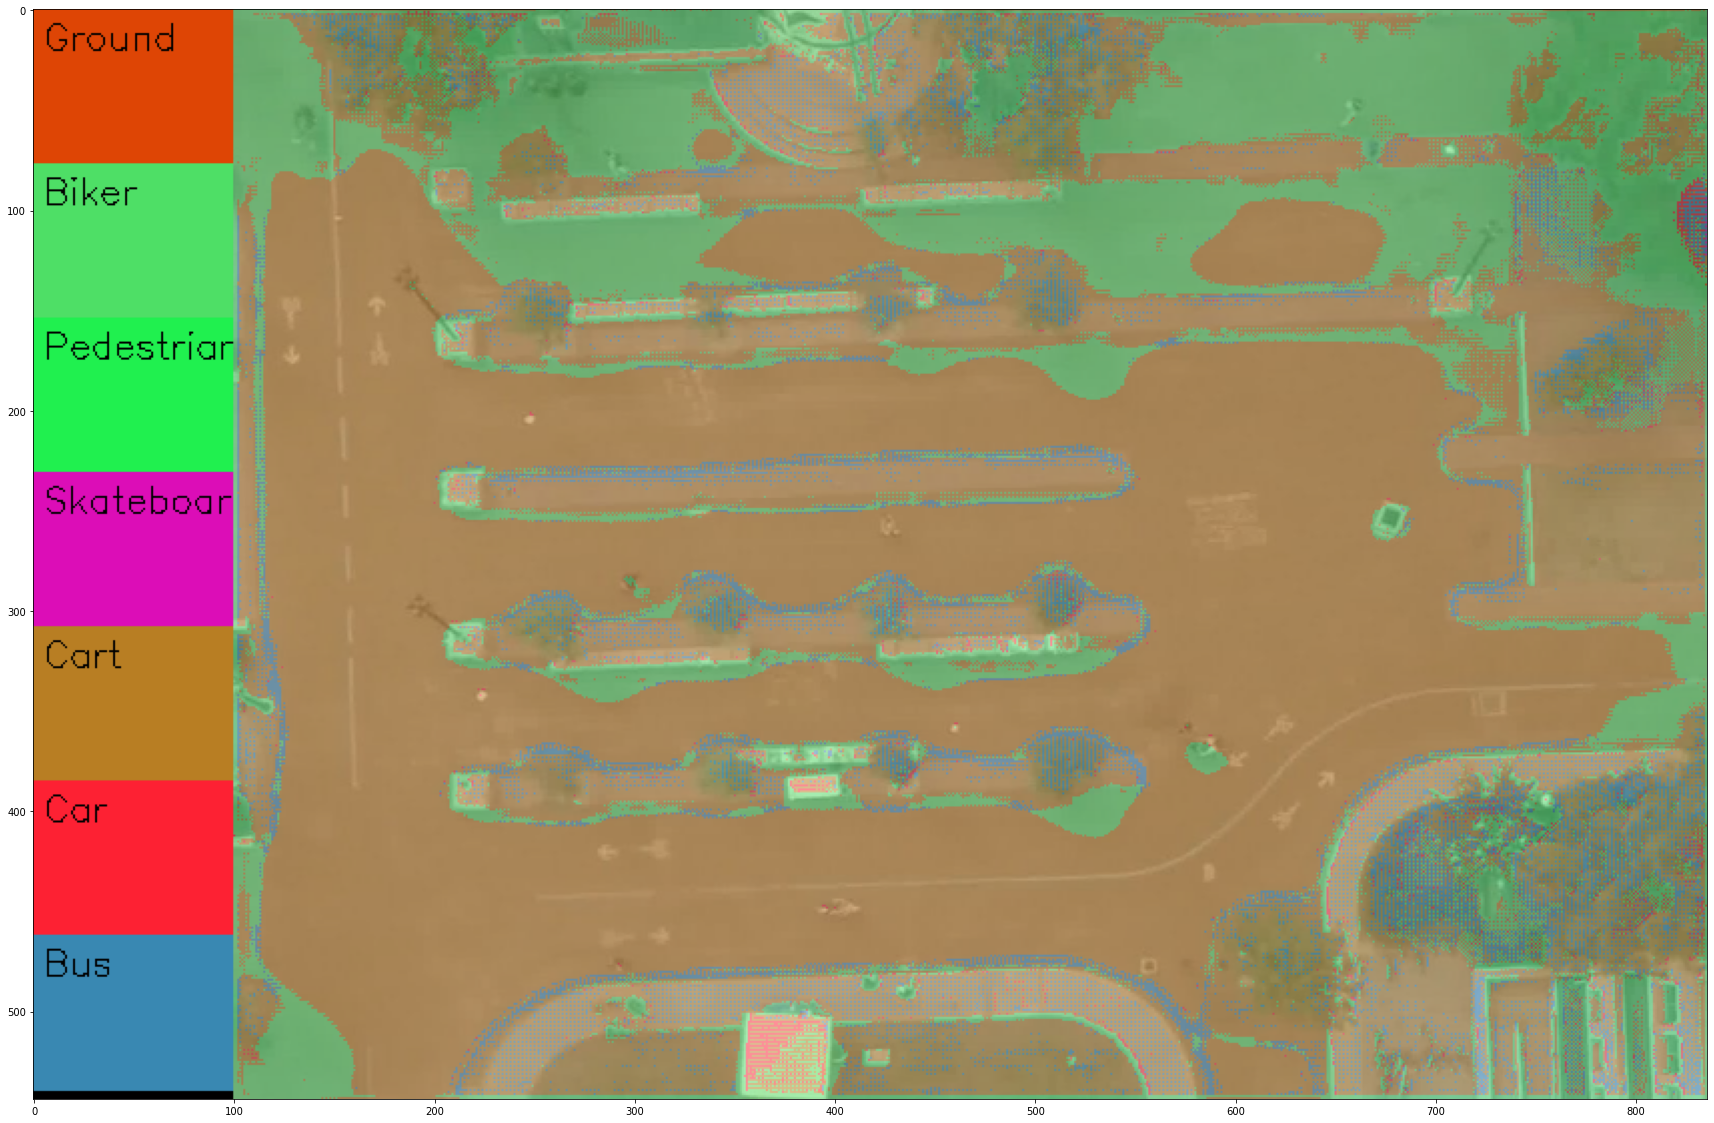

In [8]:
pr = my_model_util.predict_model_visualize(model, images_path + 'image6001.png',
                                            color, image_height, image_width)
plt.figure(figsize=(30, 30))
plt.imshow(pr)